In [152]:
import mlflow

mlflow.set_tracking_uri("file:///Users/chloe/PycharmProjects/bnb/bnb_repo/mlruns")
print("Tracking URI:", mlflow.get_tracking_uri())




Tracking URI: file:///Users/chloe/PycharmProjects/bnb/bnb_repo/mlruns


In [155]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
experiment_id = "905994001565120475"  # or whatever your correct ID is

all_runs = client.search_runs([experiment_id])
print("Total runs found:", len(all_runs))


runs = client.search_runs(
    experiment_ids=[experiment_id],
    order_by=["metrics.rmse_log ASC"],  # Optional: can remove to get all
    max_results=1
)

if runs:
    best_run = runs[0]
    print("✅ Best run ID:", best_run.info.run_id)
    print("💰 Best RMSE ($):", best_run.data.metrics["rmse_dollar"])
else:
    print("⚠️ No matching runs found in the experiment.")



Total runs found: 6
✅ Best run ID: a20cff517011465cb25e929f360a2248
💰 Best RMSE ($): 95.55628829571022


In [109]:
import pandas as pd
df=pd.read_csv('/Users/chloe/PycharmProjects/bnb/bnb_repo/data/raw/listings2.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,29059,https://www.airbnb.com/rooms/29059,20250306035235,2025-03-07,city scrape,Lovely studio Quartier Latin,CITQ 267153<br />Lovely studio with 1 closed r...,CENTRAL is the watchword: everything is close....,https://a0.muscache.com/pictures/736399/fa6c31...,125031,...,4.78,4.82,4.68,"267153, expires: 2025-04-01T00:00:00Z",f,2,2,0,0,2.67
1,29061,https://www.airbnb.com/rooms/29061,20250306035235,2025-03-07,city scrape,Maison historique - Quartier Latin,Lovely historic house with plenty of period ch...,The neighborhood you'll discover is called the...,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,...,4.82,4.87,4.71,"267153, expires: 2025-04-01T00:00:00Z",f,2,2,0,0,0.96
2,36301,https://www.airbnb.com/rooms/36301,20250306035235,2025-03-12,previous scrape,Romantic & peaceful Plateau loft,"Enjoy the best of Montreal in this romantic, ...",The neighborhood is very lively while the stre...,https://a0.muscache.com/pictures/26c20544-475f...,381468,...,4.90,4.88,4.77,NaN,f,6,6,0,0,0.44
3,38118,https://www.airbnb.com/rooms/38118,20250306035235,2025-03-11,city scrape,Beautiful room with a balcony in front of a parc,Nearest metro Papineau. Situated in front of P...,NaN,https://a0.muscache.com/pictures/213997/763ec1...,163569,...,4.82,4.65,4.41,NaN,f,2,0,2,0,0.10
4,50479,https://www.airbnb.com/rooms/50479,20250306035235,2025-03-07,city scrape,L'Arcade Douce,The appartement is sunny and ideally situated ...,Our area is full of life (but our street is qu...,https://a0.muscache.com/pictures/airflow/Hosti...,231694,...,4.98,4.84,4.93,"271530, expires: 2025-05-01T00:00:00Z",t,2,1,1,0,1.84


In [110]:
df.shape

(9772, 79)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9772 entries, 0 to 9771
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9772 non-null   int64  
 1   listing_url                                   9772 non-null   object 
 2   scrape_id                                     9772 non-null   int64  
 3   last_scraped                                  9772 non-null   object 
 4   source                                        9772 non-null   object 
 5   name                                          9772 non-null   object 
 6   description                                   9616 non-null   object 
 7   neighborhood_overview                         4421 non-null   object 
 8   picture_url                                   9772 non-null   object 
 9   host_id                                       9772 non-null   i

In [112]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [113]:


# Select relevant features
selected_columns = [
    'latitude', 'longitude', 'neighbourhood_cleansed',
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
    'property_type', 'host_is_superhost', 'host_since', 'host_listings_count',
    'availability_365', 'minimum_nights', 'maximum_nights',
    'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness',
    'review_scores_location', 'instant_bookable', 'has_availability',
    'reviews_per_month', 'price'  # target
]

df = df[selected_columns].copy()


In [221]:
import gzip
import pandas as pd

with gzip.open('/Users/chloe/PycharmProjects/bnb/bnb_repo/data/raw/calendar.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

print(df.head())


   listing_id        date available    price adjusted_price  minimum_nights  \
0       29059  2025-03-07         t  $159.00            NaN             2.0   
1       29059  2025-03-08         t  $159.00            NaN             2.0   
2       29059  2025-03-09         t  $159.00            NaN             2.0   
3       29059  2025-03-10         t  $159.00            NaN             2.0   
4       29059  2025-03-11         t  $159.00            NaN             2.0   

   maximum_nights  
0          1125.0  
1          1125.0  
2          1125.0  
3          1125.0  
4          1125.0  


/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_77262/271377722.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


In [222]:
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)
df["booked"] = df["available"].map({"f": 1, "t": 0})


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_77262/3323060173.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype(float)


In [204]:
for column in df.columns:
    print(f"\nValue counts for '{column}':")
    print(df[column].value_counts(dropna=False))  # dropna=False includes NaNs




Value counts for 'listing_id':
listing_id
17022766               368
3382961                368
1363847699851601357    368
48950205               368
692155854713096138     368
                      ... 
658897352234399600     365
658891196150511418     365
658884095364855661     365
658875355305483385     365
744459                 365
Name: count, Length: 9772, dtype: int64

Value counts for 'date':
date
2025-09-08    9772
2025-11-13    9772
2025-11-11    9772
2025-11-10    9772
2025-11-09    9772
              ... 
2026-03-08    4576
2026-03-09    1936
2025-03-06    1907
2026-03-10    1540
2026-03-11    1175
Name: count, Length: 371, dtype: int64

Value counts for 'available':
available
t    1920045
f    1649047
Name: count, dtype: int64

Value counts for 'price':
price
$100.00      180032
$150.00      137703
$200.00       87301
$120.00       75250
$250.00       73405
              ...  
$5,750.00         6
$1,650.00         5
$440.00           4
$2,250.00         3
$3,300.00      

In [207]:
df['price'].describe()

count    3.569092e+06
mean     2.423540e+02
std      6.101913e+02
min      1.500000e+01
25%      8.000000e+01
50%      1.230000e+02
75%      2.000000e+02
max      1.550000e+04
Name: price, dtype: float64

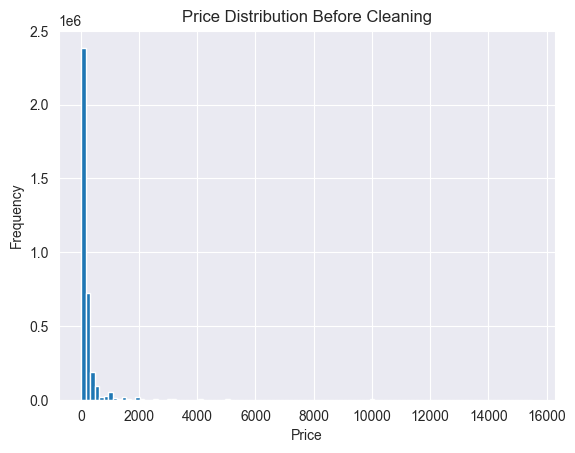

In [210]:
plt.hist(df["price"], bins=100)
plt.title("Price Distribution Before Cleaning")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [223]:
# Compute quantile bins on log-price
import numpy as np
df["log_price"] = np.log1p(df["price"])
df["price_bin"] = pd.qcut(df["log_price"], q=20, duplicates='drop')

# Get booking rate for each bin
booking_prob = df.groupby("price_bin")["booked"].mean()

# Get bin midpoints (true log-price)
midpoints = df.groupby("price_bin")["log_price"].mean()

# Convert log-price back to actual price
midpoints_actual_price = np.expm1(midpoints)


/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_77262/3174477067.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_prob = df.groupby("price_bin")["booked"].mean()
/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_77262/3174477067.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  midpoints = df.groupby("price_bin")["log_price"].mean()


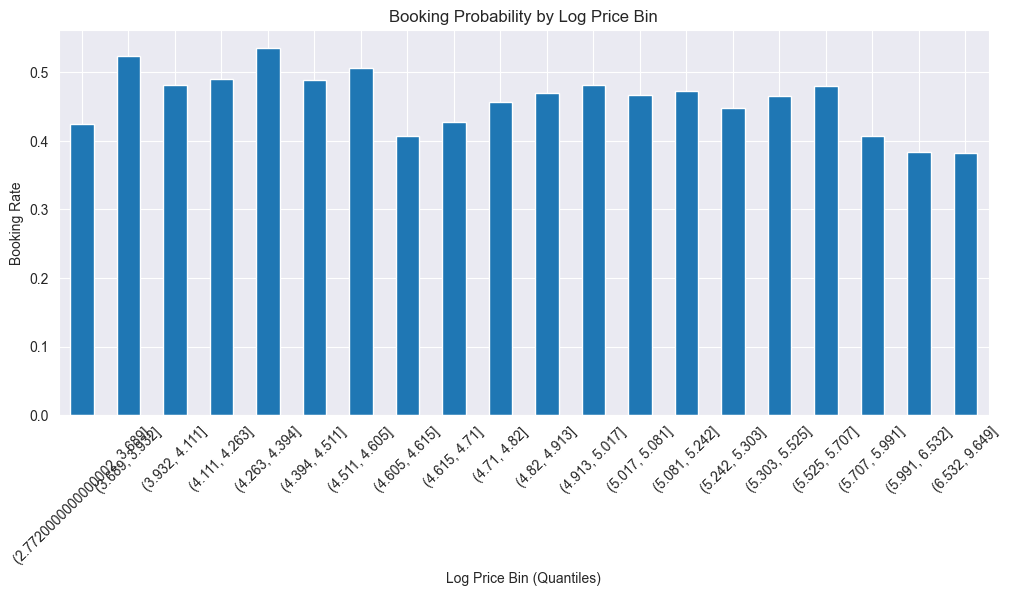

In [224]:
booking_prob.plot(kind="bar", figsize=(12, 5))
plt.title("Booking Probability by Log Price Bin")
plt.xlabel("Log Price Bin (Quantiles)")
plt.ylabel("Booking Rate")
plt.xticks(rotation=45)
plt.show()


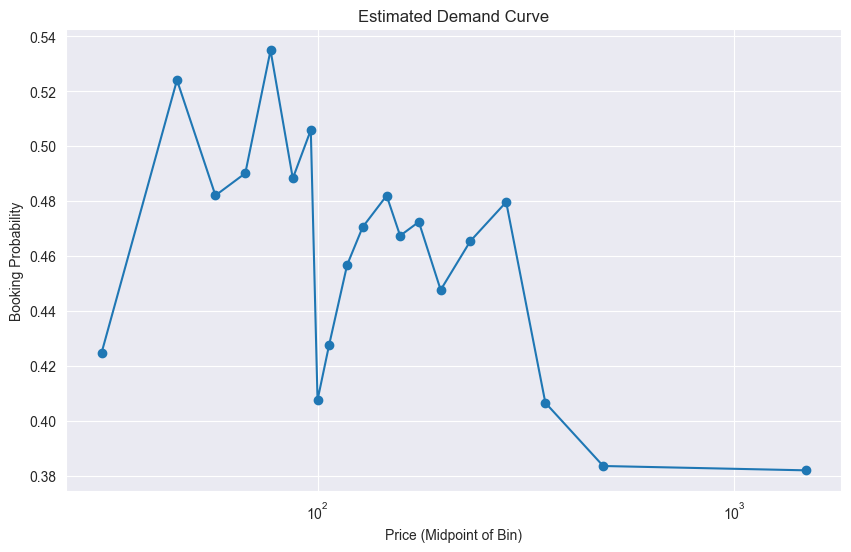

In [225]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(midpoints_actual_price, booking_prob.values, marker='o')
plt.xlabel("Price (Midpoint of Bin)")
plt.ylabel("Booking Probability")
plt.title("Estimated Demand Curve")
plt.grid(True)
plt.xscale("log")  # Optional: for better spread
plt.show()


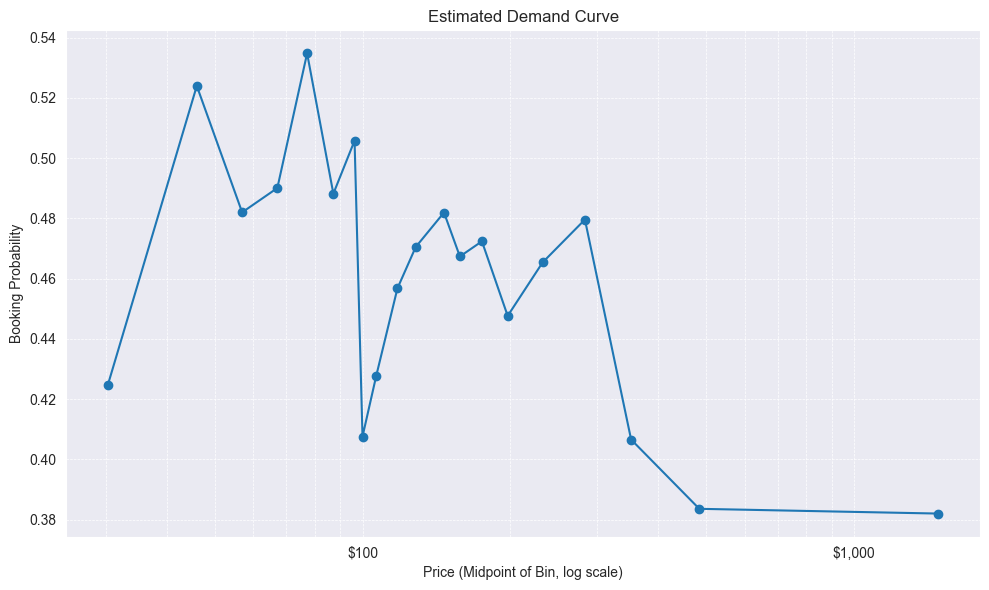

In [226]:
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.plot(midpoints_actual_price, booking_prob.values, marker='o')
plt.xscale("log")

# Format log x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(x):,}"))

plt.xlabel("Price (Midpoint of Bin, log scale)")
plt.ylabel("Booking Probability")
plt.title("Estimated Demand Curve")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


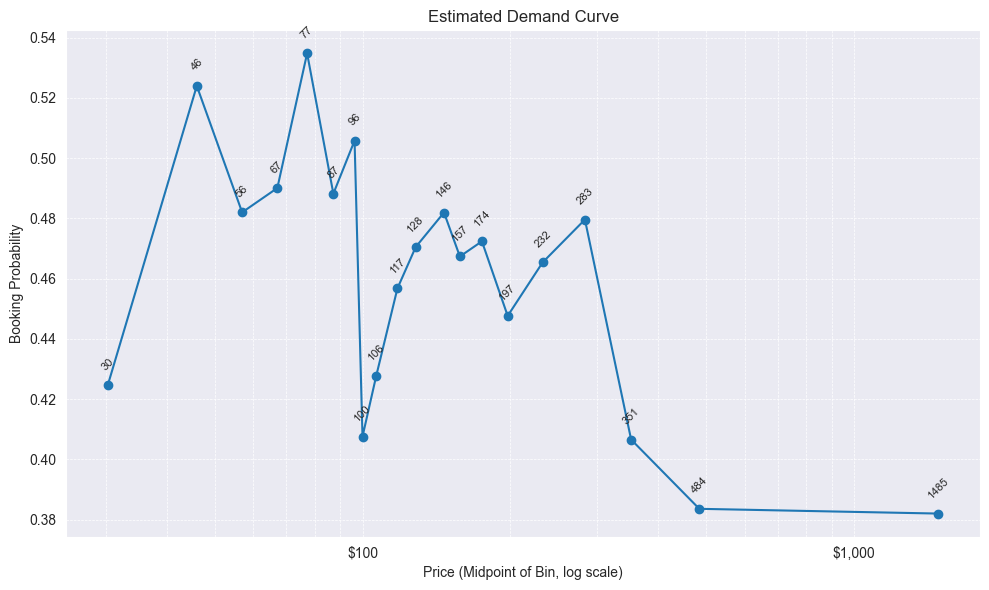

In [228]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(midpoints_actual_price, booking_prob.values, marker='o')

# Annotate each point with its price value
for x, y in zip(midpoints_actual_price, booking_prob.values):
    plt.text(x, y + 0.005, f"{int(x)}", fontsize=8, ha='center', rotation=45)

plt.xscale("log")

# Format log x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(x):,}"))

plt.xlabel("Price (Midpoint of Bin, log scale)")
plt.ylabel("Booking Probability")
plt.title("Estimated Demand Curve")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


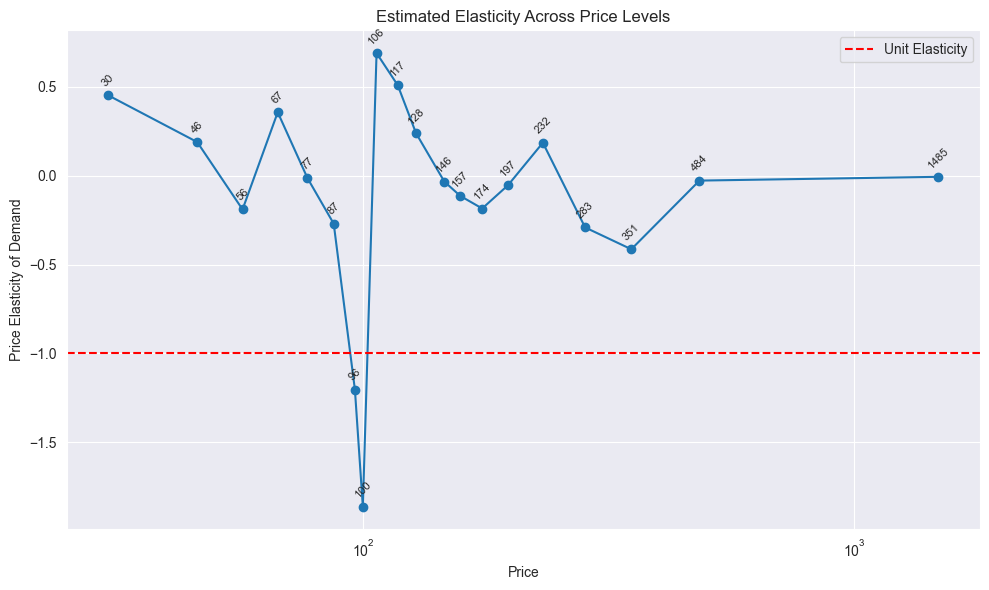

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# midpoints_actual_price: x-axis values (price midpoints)
# booking_prob.values: y-axis values (booking probabilities)

P = np.array(midpoints_actual_price)
Q = np.array(booking_prob.values)

# First-order differences (approximate derivative)
dQ = np.gradient(Q)
dP = np.gradient(P)

# Elasticity formula: (dQ/dP) * (P/Q)
elasticity = (dQ / dP) * (P / Q)

# Optional: Smooth or clip extreme values if needed
elasticity = np.clip(elasticity, -10, 10)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(P, elasticity, marker='o')

# Annotate each point with the price value
for x, y in zip(P, elasticity):
    plt.text(x, y + 0.05, f"{int(x)}", fontsize=8, ha='center', rotation=45)

plt.xscale('log')
plt.xlabel("Price")
plt.ylabel("Price Elasticity of Demand")
plt.title("Estimated Elasticity Across Price Levels")
plt.grid(True)
plt.axhline(-1, color='r', linestyle='--', label='Unit Elasticity')
plt.legend()
plt.tight_layout()
plt.show()


In [230]:
import statsmodels.api as sm
import numpy as np

log_P = np.log(midpoints_actual_price)
log_Q = np.log(booking_prob.values)

X = sm.add_constant(log_P)
model = sm.OLS(log_Q, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     9.710
Date:                Sat, 21 Jun 2025   Prob (F-statistic):            0.00597
Time:                        13:56:06   Log-Likelihood:                 23.406
No. Observations:                  20   AIC:                            -42.81
Df Residuals:                      18   BIC:                            -40.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4644      0.103     -4.503      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     5.764
Date:                Sat, 21 Jun 2025   Prob (F-statistic):            0.00429
Time:                        14:00:59   Log-Likelihood:                 30.271
No. Observations:                  20   AIC:                            -48.54
Df Residuals:                      14   BIC:                            -42.57
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

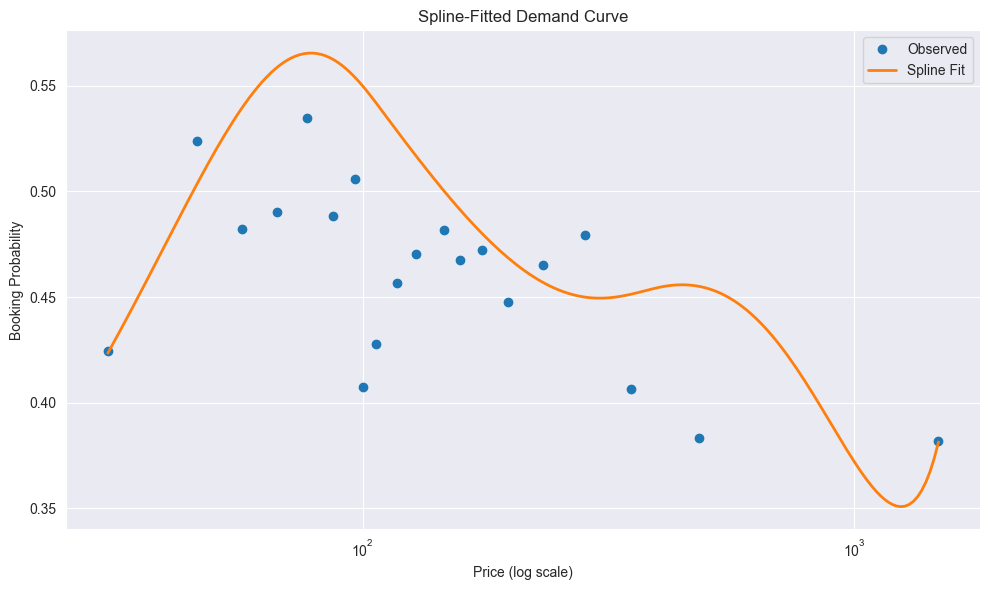

In [231]:
from patsy import dmatrix
import statsmodels.api as sm

# Spline basis for log price
x_spline = dmatrix("bs(np.log(midpoints_actual_price), df=5, degree=3, include_intercept=False)",
                   {"midpoints_actual_price": midpoints_actual_price}, return_type='dataframe')

# Fit the spline model
spline_model = sm.OLS(np.log(booking_prob.values), x_spline).fit()
print(spline_model.summary())

# Predict and plot
log_price_grid = np.linspace(np.log(min(midpoints_actual_price)), np.log(max(midpoints_actual_price)), 200)
x_pred = dmatrix("bs(x, df=5, degree=3, include_intercept=False)", {"x": np.exp(log_price_grid)}, return_type='dataframe')
log_demand_pred = spline_model.predict(x_pred)

plt.figure(figsize=(10, 6))
plt.plot(midpoints_actual_price, booking_prob.values, 'o', label="Observed")
plt.plot(np.exp(log_price_grid), np.exp(log_demand_pred), label="Spline Fit", lw=2)
plt.xscale('log')
plt.xlabel("Price (log scale)")
plt.ylabel("Booking Probability")
plt.title("Spline-Fitted Demand Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [217]:
df.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights', 'price_range'],
      dtype='object')

In [193]:
df["price_bin"] = pd.cut(df["price"], bins=20)
booking_rate = df.groupby("price_bin")["booked"].mean()


/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_77262/1054195229.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_rate = df.groupby("price_bin")["booked"].mean()


Text(0.5, 0, 'Price Range')

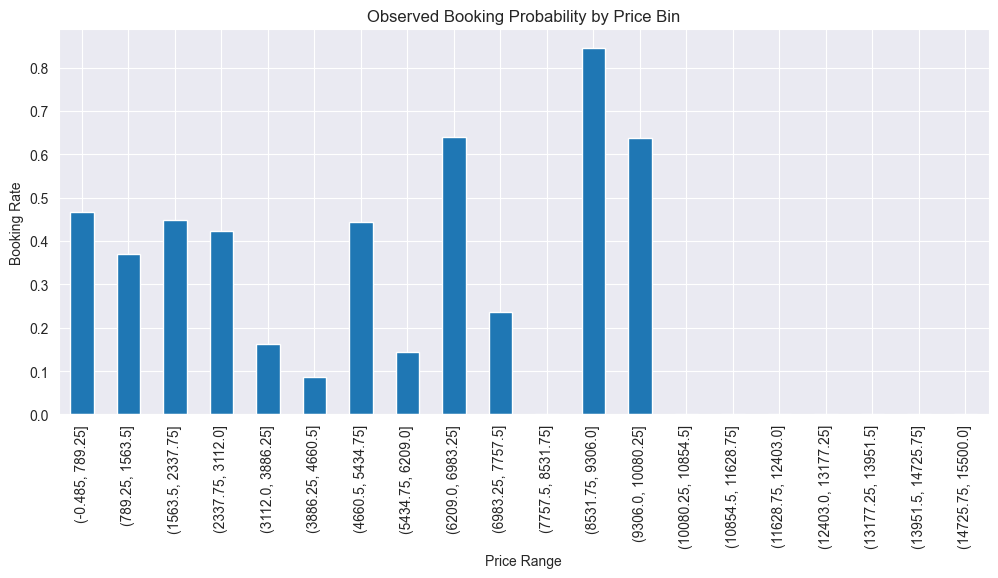

In [194]:
booking_rate.plot(kind="bar", figsize=(12,5))
plt.title("Observed Booking Probability by Price Bin")
plt.ylabel("Booking Rate")
plt.xlabel("Price Range")


In [114]:
df.head()

,latitude,longitude,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,property_type,host_is_superhost,...,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,has_availability,reviews_per_month,price
0,45.51939,-73.56482,Ville-Marie,Entire home/apt,4,1.0,1.0,3.0,Entire rental unit,t,...,2,60,478,4.68,4.63,4.82,f,t,2.67,$161.00
1,45.51929,-73.56493,Ville-Marie,Entire home/apt,4,1.0,2.0,2.0,Entire home,t,...,2,21,153,4.74,4.68,4.87,f,t,0.96,$271.00
2,45.53026,-73.58413,Le Plateau-Mont-Royal,Entire home/apt,2,NaN,1.0,NaN,Entire rental unit,t,...,210,730,52,4.87,4.87,4.88,f,t,0.44,NaN
3,45.52699,-73.55840,Ville-Marie,Private room,1,1.0,3.0,4.0,Private room in rental unit,f,...,31,60,17,4.53,4.24,4.65,f,t,0.10,$47.00
4,45.54157,-73.60737,Rosemont-La Petite-Patrie,Entire home/apt,3,1.0,2.0,2.0,Entire rental unit,t,...,3,28,323,4.96,4.94,4.84,t,t,1.84,$112.00


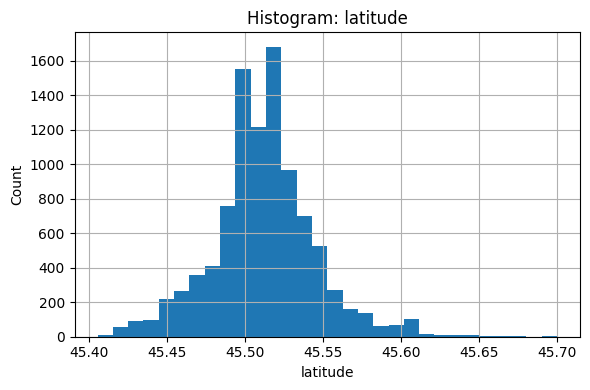

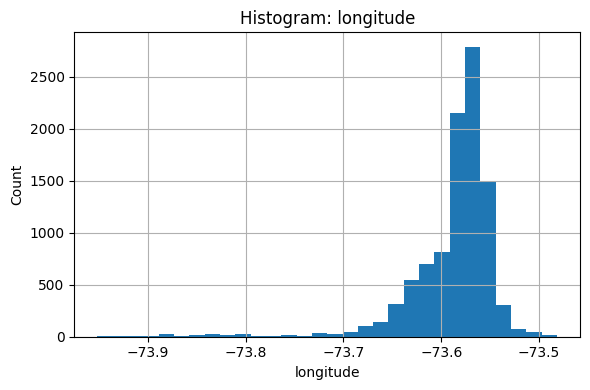

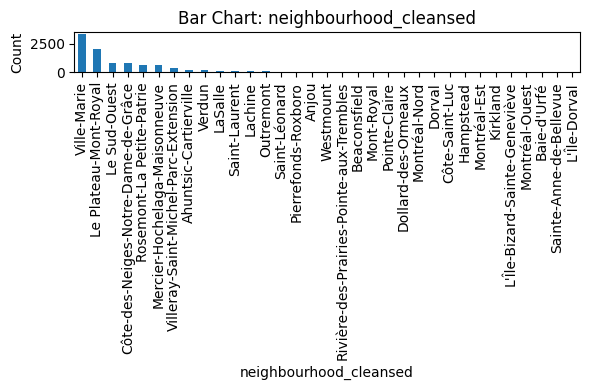

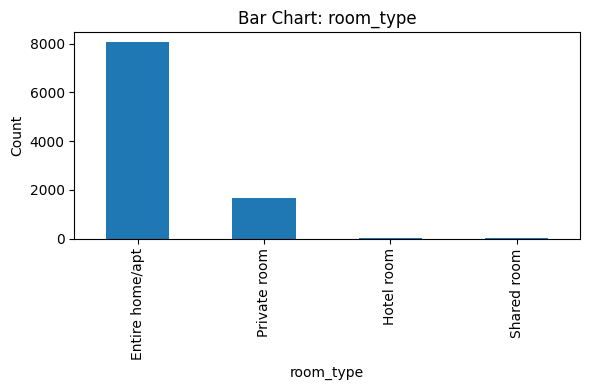

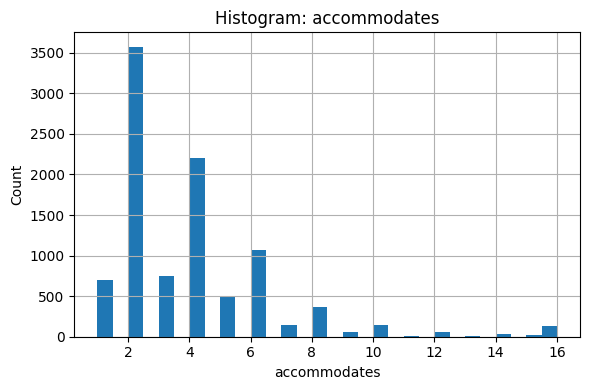

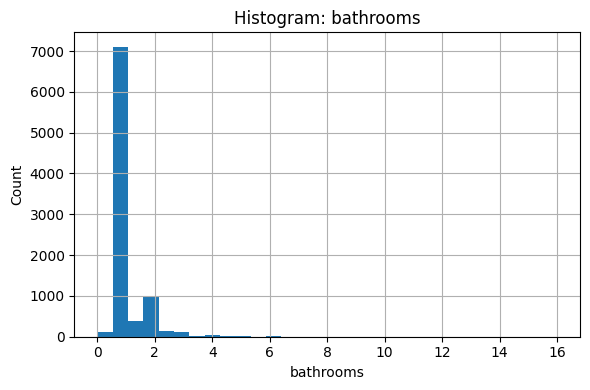

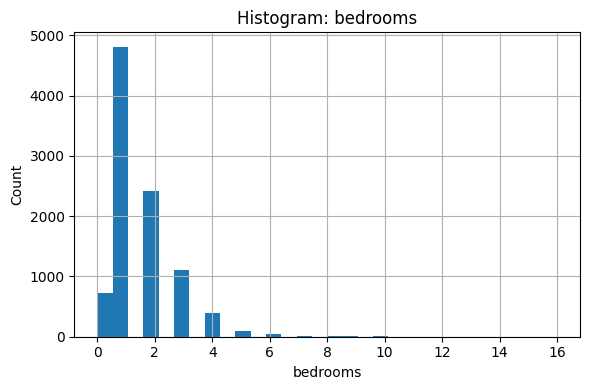

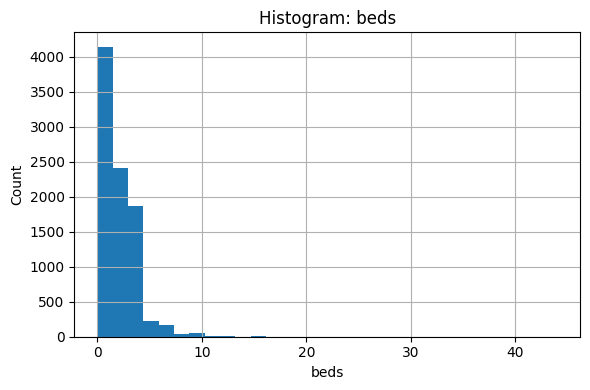

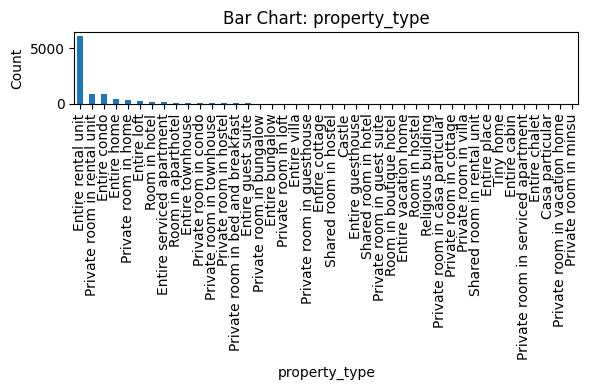

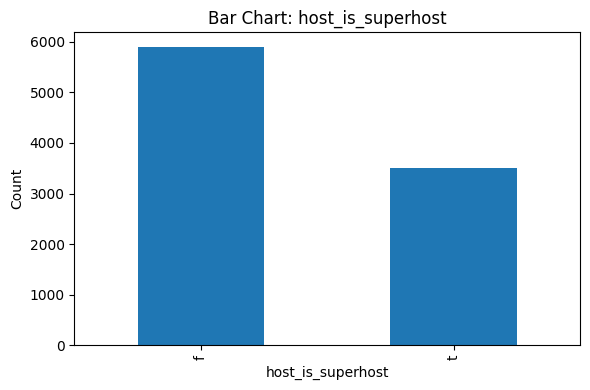

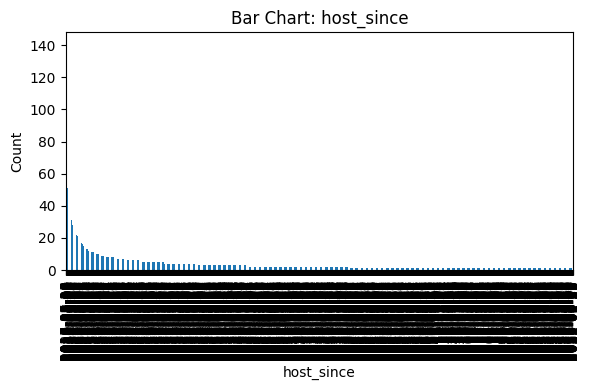

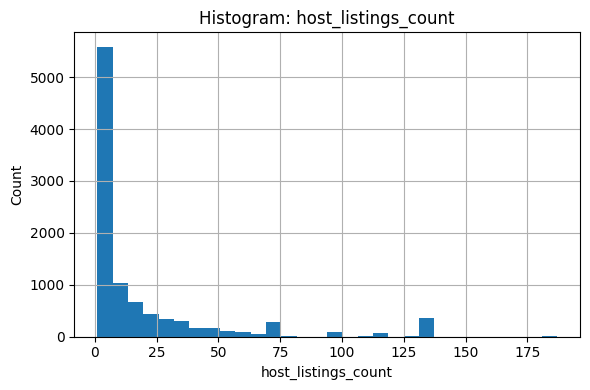

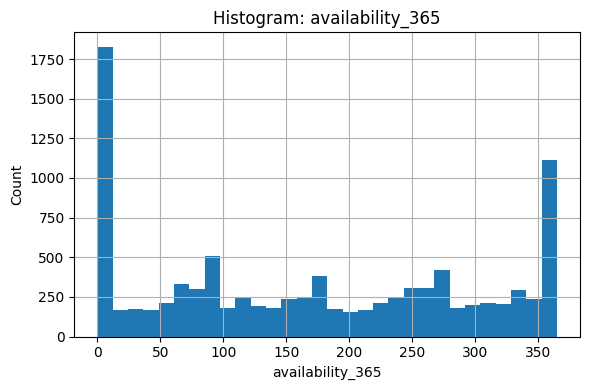

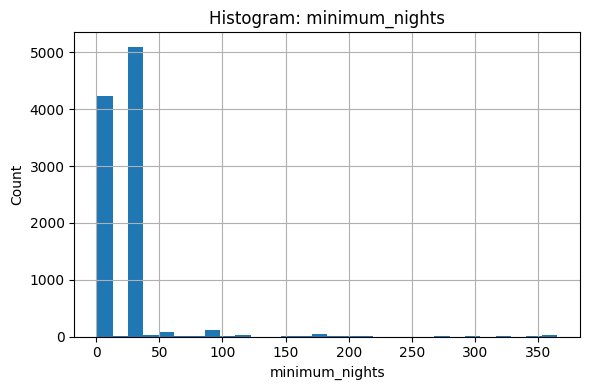

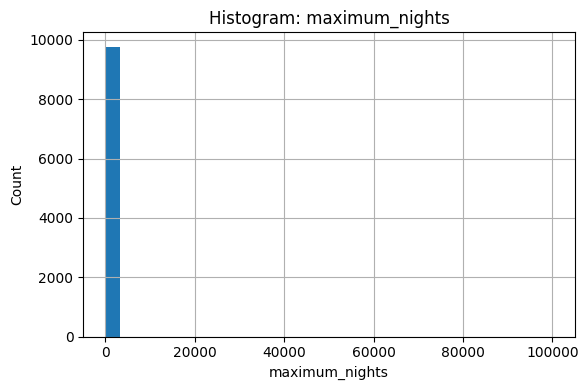

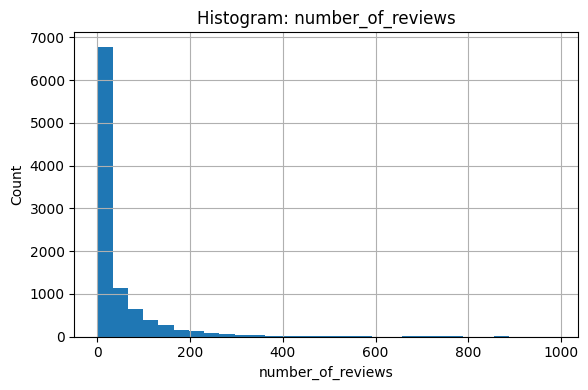

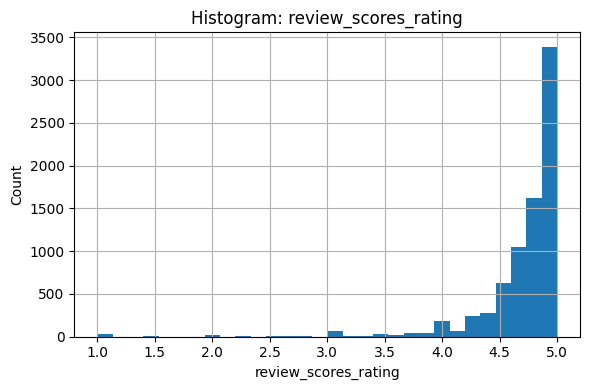

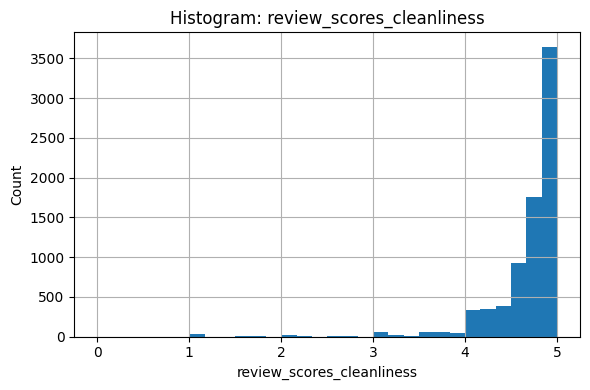

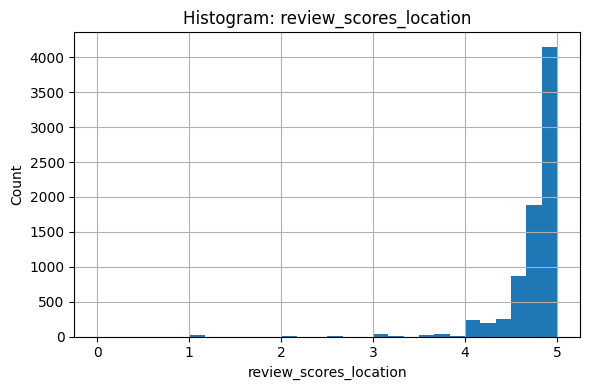

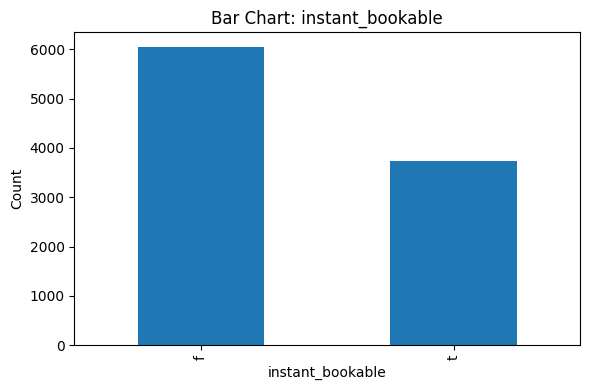

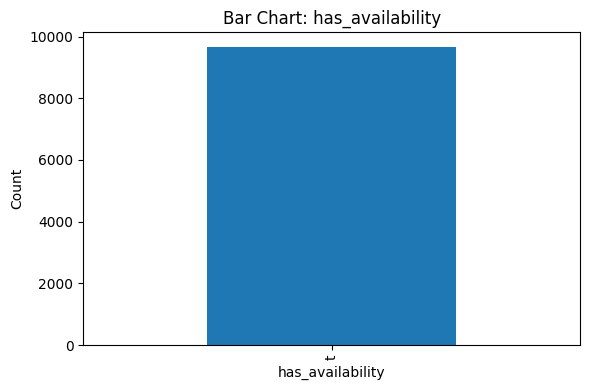

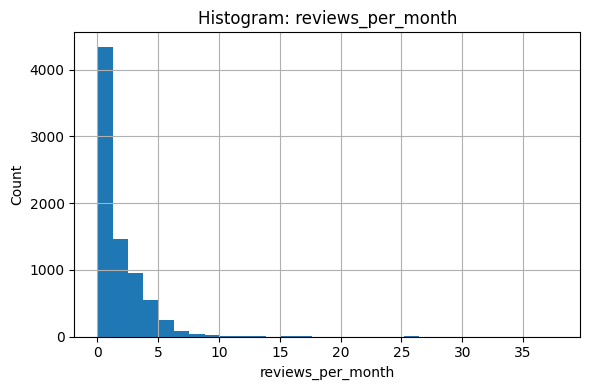

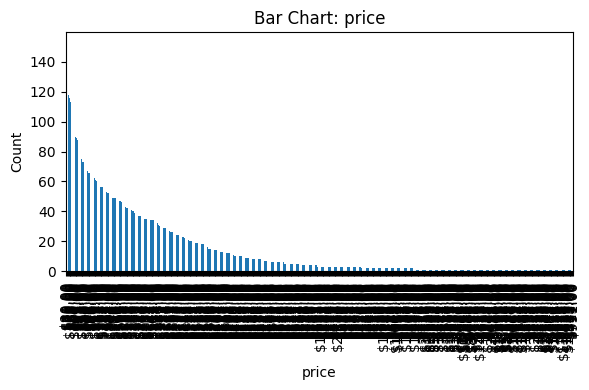

In [115]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(6, 4))
    if df[col].dtype == 'object':
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Chart: {col}')
    else:
        df[col].hist(bins=30)
        plt.title(f'Histogram: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


In [116]:
# Get categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Loop through and print value counts
for col in categorical_cols:
    print(f"\n📊 Column: {col}")
    print(df[col].value_counts(dropna=False))



📊 Column: neighbourhood_cleansed
neighbourhood_cleansed
Ville-Marie                                 3320
Le Plateau-Mont-Royal                       2000
Le Sud-Ouest                                 810
Côte-des-Neiges-Notre-Dame-de-Grâce          772
Rosemont-La Petite-Patrie                    640
Mercier-Hochelaga-Maisonneuve                591
Villeray-Saint-Michel-Parc-Extension         391
Ahuntsic-Cartierville                        231
Verdun                                       203
LaSalle                                      122
Saint-Laurent                                110
Lachine                                       82
Outremont                                     67
Saint-Léonard                                 56
Pierrefonds-Roxboro                           46
Anjou                                         40
Westmount                                     37
Rivière-des-Prairies-Pointe-aux-Trembles      33
Beaconsfield                                  28
Mont-Royal  

In [117]:
# drop column' has_availability' since it is almost only have one value
df.drop(columns=['has_availability'], inplace=True)

In [118]:

df = df[~df['room_type'].isin(['Hotel room', 'Shared room'])]


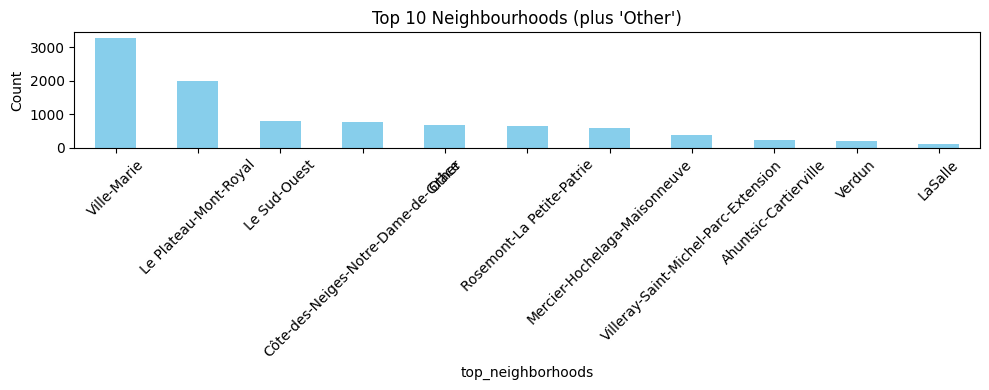

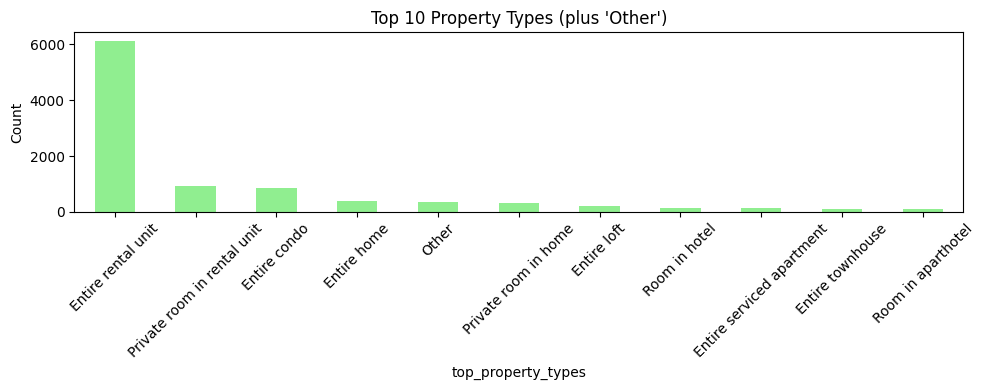

In [119]:
# keep only first 10 categories for column 'neighbourhood_cleansed' and 'property_type' as there are too many columns

# Limit 'neighbourhood_cleansed' to top 10
top_neighborhoods = df['neighbourhood_cleansed'].value_counts().nlargest(10).index
df['top_neighborhoods'] = df['neighbourhood_cleansed'].apply(
    lambda x: x if x in top_neighborhoods else 'Other'
)

# Limit 'property_type' to top 10
top_property_types = df['property_type'].value_counts().nlargest(10).index
df['top_property_types'] = df['property_type'].apply(
    lambda x: x if x in top_property_types else 'Other'
)

# Plot top neighborhoods
df['top_neighborhoods'].value_counts().plot(kind='bar', figsize=(10, 4), color='skyblue')
plt.title("Top 10 Neighbourhoods (plus 'Other')")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot top property types
df['top_property_types'].value_counts().plot(kind='bar', figsize=(10, 4), color='lightgreen')
plt.title("Top 10 Property Types (plus 'Other')")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [120]:
# Get categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Loop through and print value counts
for col in categorical_cols:
    print(f"\n📊 Column: {col}")
    print(df[col].value_counts(dropna=False))


📊 Column: neighbourhood_cleansed
neighbourhood_cleansed
Ville-Marie                                 3282
Le Plateau-Mont-Royal                       2000
Le Sud-Ouest                                 810
Côte-des-Neiges-Notre-Dame-de-Grâce          772
Rosemont-La Petite-Patrie                    639
Mercier-Hochelaga-Maisonneuve                591
Villeray-Saint-Michel-Parc-Extension         391
Ahuntsic-Cartierville                        231
Verdun                                       203
LaSalle                                      122
Saint-Laurent                                110
Lachine                                       82
Outremont                                     67
Saint-Léonard                                 56
Pierrefonds-Roxboro                           46
Anjou                                         40
Westmount                                     35
Rivière-des-Prairies-Pointe-aux-Trembles      33
Beaconsfield                                  28
Mont-Royal  

In [121]:
df.head()

,latitude,longitude,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,property_type,host_is_superhost,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_location,instant_bookable,reviews_per_month,price,top_neighborhoods,top_property_types
0,45.51939,-73.56482,Ville-Marie,Entire home/apt,4,1.0,1.0,3.0,Entire rental unit,t,...,60,478,4.68,4.63,4.82,f,2.67,$161.00,Ville-Marie,Entire rental unit
1,45.51929,-73.56493,Ville-Marie,Entire home/apt,4,1.0,2.0,2.0,Entire home,t,...,21,153,4.74,4.68,4.87,f,0.96,$271.00,Ville-Marie,Entire home
2,45.53026,-73.58413,Le Plateau-Mont-Royal,Entire home/apt,2,NaN,1.0,NaN,Entire rental unit,t,...,730,52,4.87,4.87,4.88,f,0.44,NaN,Le Plateau-Mont-Royal,Entire rental unit
3,45.52699,-73.55840,Ville-Marie,Private room,1,1.0,3.0,4.0,Private room in rental unit,f,...,60,17,4.53,4.24,4.65,f,0.10,$47.00,Ville-Marie,Private room in rental unit
4,45.54157,-73.60737,Rosemont-La Petite-Patrie,Entire home/apt,3,1.0,2.0,2.0,Entire rental unit,t,...,28,323,4.96,4.94,4.84,t,1.84,$112.00,Rosemont-La Petite-Patrie,Entire rental unit


In [122]:
dF =pd.read_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/interim/airbnb_montreal_tmp.csv")
dF. head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,host_is_superhost,host_listings_count,availability_365,minimum_nights,...,neighbourhood_cleansed_LaSalle,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Other,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension,price_per_person
0,45.51939,-73.56482,4,1.0,1.0,3.0,1,2.0,350,2,...,False,False,False,False,False,False,False,True,False,40.250000
1,45.51929,-73.56493,4,1.0,2.0,2.0,1,2.0,327,2,...,False,False,False,False,False,False,False,True,False,67.750000
2,45.53026,-73.58413,2,1.0,1.0,2.0,1,8.0,190,210,...,False,True,False,False,False,False,False,False,False,50.000000
3,45.52699,-73.55840,1,1.0,3.0,4.0,0,3.0,313,31,...,False,False,False,False,False,False,False,True,False,47.000000
4,45.54157,-73.60737,3,1.0,2.0,2.0,1,2.0,34,3,...,False,False,False,False,False,True,False,False,False,37.333333


In [123]:
dF.shape

(9731, 42)

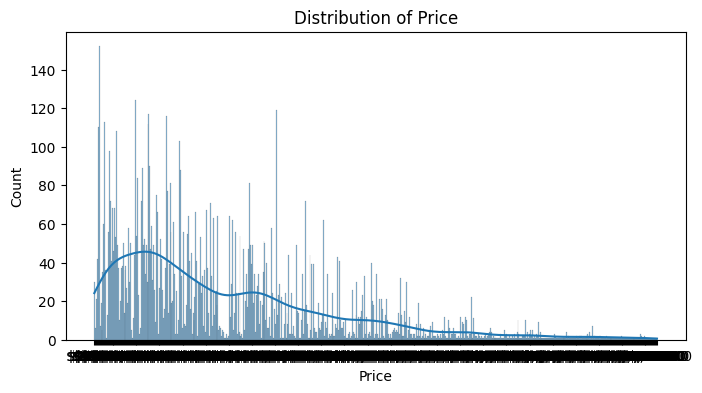

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


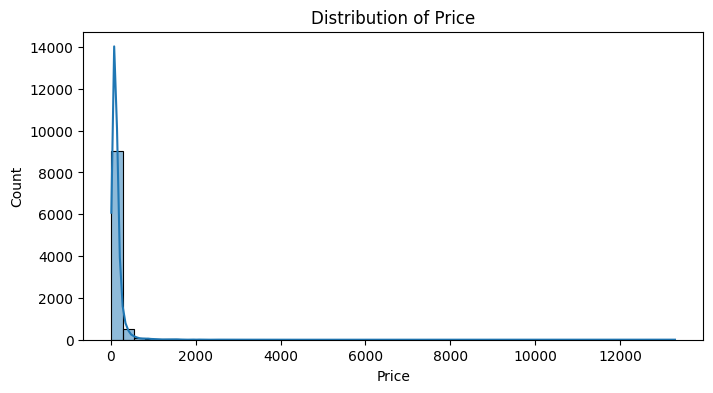

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(dF['price'], bins=50, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [126]:
dF['price'].skew()


np.float64(26.092301199804616)

<Axes: xlabel='price', ylabel='Count'>

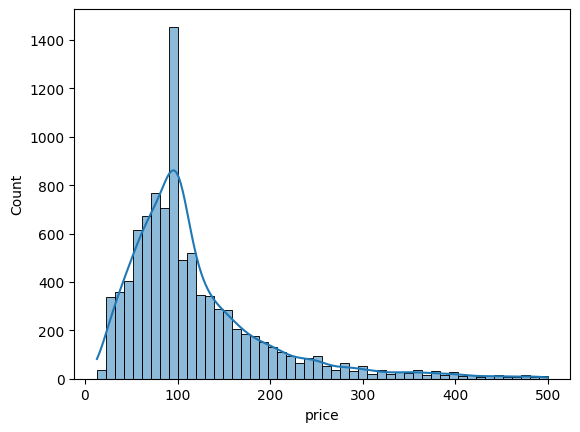

In [127]:
sns.histplot(dF[dF['price'] <= 500]['price'], bins=50, kde=True)


In [128]:
# import matplotlib.pyplot as plt
#
# for col in dF.columns:
#     plt.figure(figsize=(6, 4))
#     if dF[col].dtype == 'object':
#         dF[col].value_counts().plot(kind='bar')
#         plt.title(f'Bar Chart: {col}')
#     else:
#         dF[col].hist(bins=30)
#         plt.title(f'Histogram: {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.tight_layout()
#     plt.show()

In [132]:
dF['price'].describe()

count     9731.000000
mean       142.786456
std        297.033475
min         13.000000
25%         72.000000
50%        100.000000
75%        148.000000
max      13294.000000
Name: price, dtype: float64

In [140]:
dF['price_per_person'].skew()

np.float64(45.858359102830136)

In [131]:
dF['price_per_person'].describe()

count    9731.000000
mean       41.684422
std        97.538204
min         4.000000
25%        22.666667
50%        32.000000
75%        48.333333
max      6647.000000
Name: price_per_person, dtype: float64

In [133]:
import numpy as np

dF['log_price'] = np.log1p(dF['price'])  # log(1 + price) to handle price=0


In [134]:
dF.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,host_is_superhost,host_listings_count,availability_365,minimum_nights,...,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Other,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension,price_per_person,log_price,log_price_per_person
0,45.51939,-73.56482,4,1.0,1.0,3.0,1,2.0,350,2,...,False,False,False,False,False,True,False,40.250000,5.087596,3.719651
1,45.51929,-73.56493,4,1.0,2.0,2.0,1,2.0,327,2,...,False,False,False,False,False,True,False,67.750000,5.605802,4.230477
2,45.53026,-73.58413,2,1.0,1.0,2.0,1,8.0,190,210,...,False,False,False,False,False,False,False,50.000000,4.615121,3.931826
3,45.52699,-73.55840,1,1.0,3.0,4.0,0,3.0,313,31,...,False,False,False,False,False,True,False,47.000000,3.871201,3.871201
4,45.54157,-73.60737,3,1.0,2.0,2.0,1,2.0,34,3,...,False,False,False,True,False,False,False,37.333333,4.727388,3.646320


In [141]:
dF.drop(columns=['price_per_person'], inplace=True)

In [146]:
dF.to_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/processed/airbnb_montreal_cleaned.csv", index=False)
print("Data cleaned and saved.")

Data cleaned and saved.


In [157]:
df=pd.read_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/processed/airbnb_montreal_cleaned.csv")
c = (df['price'] >1000).sum() / len(df['price'])
c

np.float64(0.006885212208406125)

In [ ]:
df=pd.read_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/processed/airbnb_montreal_cleaned.csv")
df=df

In [158]:
dF.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,host_is_superhost,host_listings_count,availability_365,minimum_nights,...,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Other,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension,log_price,log_price_per_person
0,45.51939,-73.56482,4,1.0,1.0,3.0,1,2.0,350,2,...,False,False,False,False,False,False,True,False,5.087596,3.719651
1,45.51929,-73.56493,4,1.0,2.0,2.0,1,2.0,327,2,...,False,False,False,False,False,False,True,False,5.605802,4.230477
2,45.53026,-73.58413,2,1.0,1.0,2.0,1,8.0,190,210,...,True,False,False,False,False,False,False,False,4.615121,3.931826
3,45.52699,-73.55840,1,1.0,3.0,4.0,0,3.0,313,31,...,False,False,False,False,False,False,True,False,3.871201,3.871201
4,45.54157,-73.60737,3,1.0,2.0,2.0,1,2.0,34,3,...,False,False,False,False,True,False,False,False,4.727388,3.646320


In [160]:
df_1=dF[dF['price'] <1000]

df_1.to_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/processed/airbnb_montreal_cleaned_1.csv", index=False)
print("Data cleaned and saved.")

Data cleaned and saved.


In [161]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,host_is_superhost,host_listings_count,availability_365,minimum_nights,...,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Other,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension,log_price,log_price_per_person
0,45.51939,-73.56482,4,1.0,1.0,3.0,1,2.0,350,2,...,False,False,False,False,False,False,True,False,5.087596,3.719651
1,45.51929,-73.56493,4,1.0,2.0,2.0,1,2.0,327,2,...,False,False,False,False,False,False,True,False,5.605802,4.230477
2,45.53026,-73.58413,2,1.0,1.0,2.0,1,8.0,190,210,...,True,False,False,False,False,False,False,False,4.615121,3.931826
3,45.52699,-73.55840,1,1.0,3.0,4.0,0,3.0,313,31,...,False,False,False,False,False,False,True,False,3.871201,3.871201
4,45.54157,-73.60737,3,1.0,2.0,2.0,1,2.0,34,3,...,False,False,False,False,True,False,False,False,4.727388,3.646320


In [164]:
(df['instant_bookable'] == 0).sum()


np.int64(6020)

In [165]:
(df['instant_bookable'] == 1).sum()

np.int64(3711)

In [168]:
import pandas as pd
df=pd.read_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/processed/airbnb_montreal_cleaned_1.csv")
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,host_is_superhost,host_listings_count,availability_365,minimum_nights,...,neighbourhood_cleansed_Côte-des-Neiges-Notre-Dame-de-Grâce,neighbourhood_cleansed_LaSalle,neighbourhood_cleansed_Le Plateau-Mont-Royal,neighbourhood_cleansed_Le Sud-Ouest,neighbourhood_cleansed_Mercier-Hochelaga-Maisonneuve,neighbourhood_cleansed_Other,neighbourhood_cleansed_Rosemont-La Petite-Patrie,neighbourhood_cleansed_Verdun,neighbourhood_cleansed_Ville-Marie,neighbourhood_cleansed_Villeray-Saint-Michel-Parc-Extension
0,45.51939,-73.56482,4,1.0,1.0,3.0,1,2.0,350,2,...,False,False,False,False,False,False,False,False,True,False
1,45.51929,-73.56493,4,1.0,2.0,2.0,1,2.0,327,2,...,False,False,False,False,False,False,False,False,True,False
2,45.53026,-73.58413,2,1.0,1.0,2.0,1,8.0,190,210,...,False,False,True,False,False,False,False,False,False,False
3,45.52699,-73.55840,1,1.0,3.0,4.0,0,3.0,313,31,...,False,False,False,False,False,False,False,False,True,False
4,45.54157,-73.60737,3,1.0,2.0,2.0,1,2.0,34,3,...,False,False,False,False,False,False,True,False,False,False


In [169]:
!pip install shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 7.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [shap]3/4 [shap]]te]


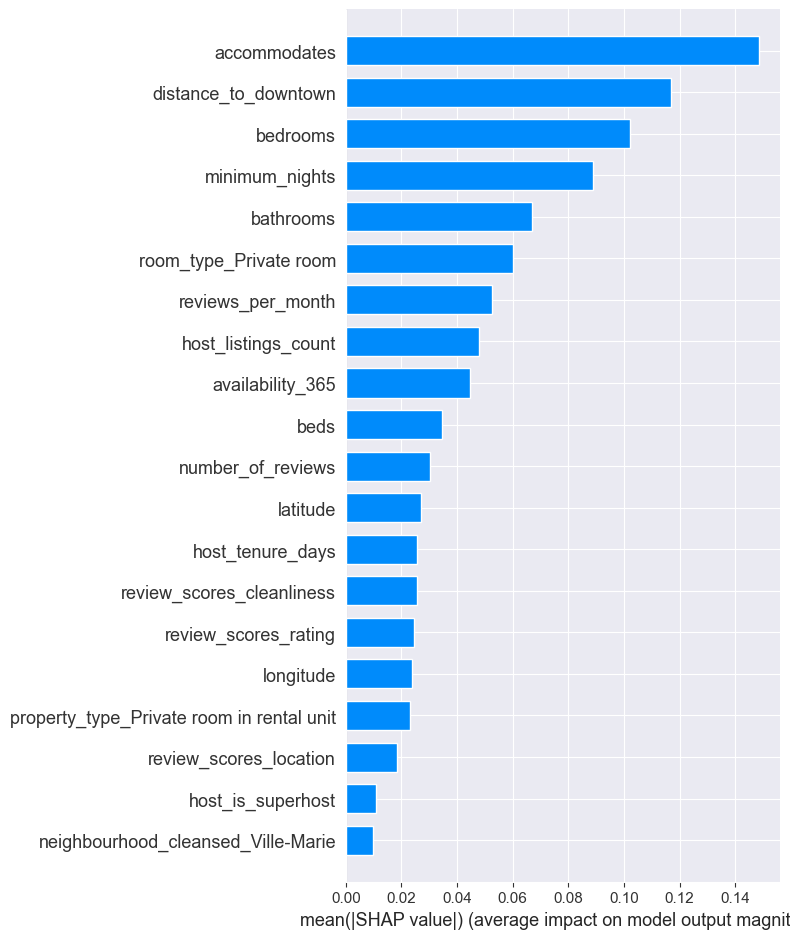

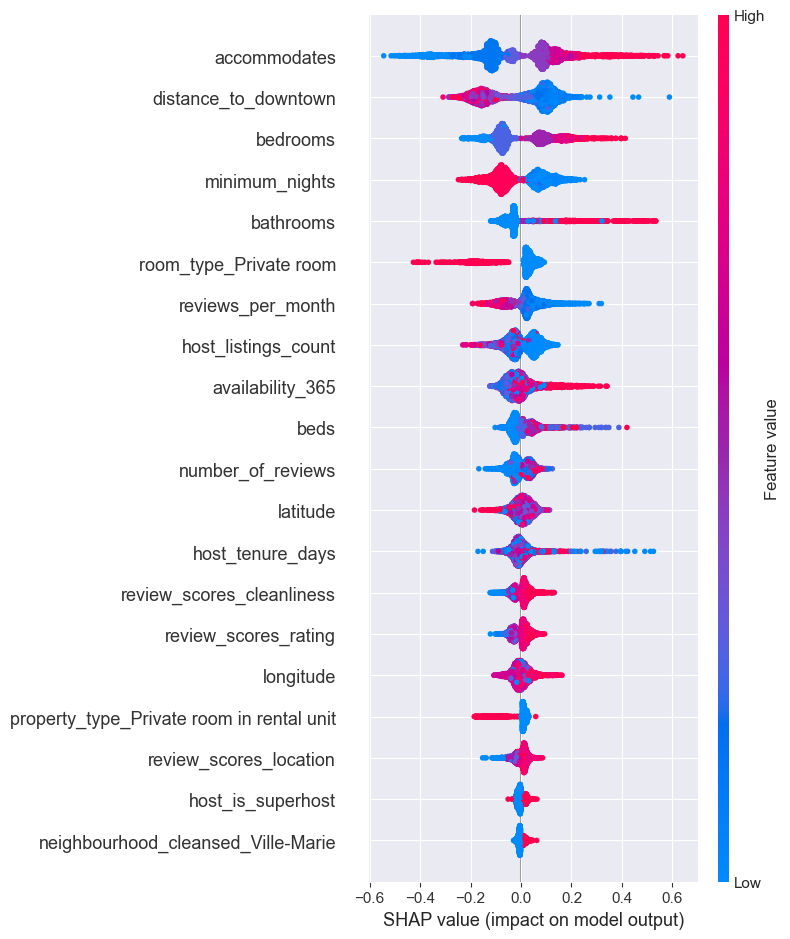

In [176]:
import pandas as pd
import shap
import mlflow
from mlflow.sklearn import load_model
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
REGISTERED_MODEL_NAME = "airbnb_best_model_in_range"
MODEL_VERSION = 3
DATA_FILE = "airbnb_montreal_cleaned.csv"
TARGET_COLUMN = "price"

# --- Set MLflow tracking URI ---
mlflow.set_tracking_uri("file:///Users/chloe/PycharmProjects/bnb/bnb_repo/mlruns")

# ✅ Set correct base directory explicitly
BASE_DIR = Path("/Users/chloe/PycharmProjects/bnb/bnb_repo")  # not .resolve().parents[1]
DATA_PATH = BASE_DIR / "data" / "processed" / DATA_FILE
model_uri = f"models:/{REGISTERED_MODEL_NAME}/{MODEL_VERSION}"

# --- Load model from MLflow registry ---
model = load_model(model_uri)

# --- Load and prepare dataset ---
df = pd.read_csv(DATA_PATH)
X = df.drop(columns=["log_price", "log_price_per_person", "price", "price_per_person"], errors="ignore")
y = df[TARGET_COLUMN]

# Sample for faster SHAP computation
X_sample = X.sample(5000, random_state=42)

# --- SHAP Explanation ---
explainer = shap.Explainer(model)
shap_values = explainer(X_sample)

# --- Visualize SHAP summaries ---
shap.summary_plot(shap_values, X_sample, plot_type="bar")  # Bar plot
shap.summary_plot(shap_values, X_sample)                   # Beeswarm plot


In [234]:
df= pd.read_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/raw/listings.csv")
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
df= pd.read_csv("/Users/chloe/PycharmProjects/bnb/bnb_repo/data/raw/listings.csv")
df.columns

In [236]:
import pandas as pd

# Replace with your actual path
df = pd.read_csv('/Users/chloe/PycharmProjects/bnb/bnb_repo/data/raw/calendar.csv.gz')

# Show first few rows
df.head()


/var/folders/mt/7wg45jq50jdbqy4g39cqxf6c0000gn/T/ipykernel_77262/2538447189.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/chloe/PycharmProjects/bnb/bnb_repo/data/raw/calendar.csv.gz')


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,29059,2025-03-07,t,$159.00,NaN,2.0,1125.0
1,29059,2025-03-08,t,$159.00,NaN,2.0,1125.0
2,29059,2025-03-09,t,$159.00,NaN,2.0,1125.0
3,29059,2025-03-10,t,$159.00,NaN,2.0,1125.0
4,29059,2025-03-11,t,$159.00,NaN,2.0,1125.0


In [237]:
df.to_csv('/Users/chloe/PycharmProjects/bnb/bnb_repo/data/processed/calendar.csv', index=False)